# СОЗДАНИЕ МОДЕЛЕЙ 

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, BayesianRidge, SGDRegressor, ARDRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, GridSearchCV, RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer, OrdinalEncoder, PolynomialFeatures
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Activation, Dropout, LSTM
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

%matplotlib inline

In [3]:
# загрузка и просмотр датасета
#df = pd.read_excel('../data/processed/df.xlsx', index_col=0)
df = pd.read_excel('../data/processed/df_clean.xlsx', index_col=0)
#df = pd.read_excel('../data/processed/df_prep.xlsx', index_col=0)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074


# Модуль упругости при растяжении и Прочность при растяжении

In [4]:
# хранение оценок моделей
MAE_Emod=[] # средняя абсолютная ошибка - Модуль упругости при растяжении
R2_Emod=[] # коэффициент детерминации - Модуль упругости при растяжении

MAE_Rm=[] # средняя абсолютная ошибка - Прочность при растяжении
R2_Rm=[] # коэффициент детерминации - Прочность при растяжении

In [5]:
# выделение целевых переменных
y = df[['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']]
y_Emod = df[['Модуль упругости при растяжении, ГПа']]
y_Rm = df[['Прочность при растяжении, МПа']]
y.head()

,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
1,70.0,3000.0
3,70.0,3000.0
4,70.0,3000.0
5,70.0,3000.0
6,70.0,3000.0


In [6]:
X = df.drop(['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)
X.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,220.0,0,4.0,60.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,220.0,0,5.0,70.0


In [7]:
# разбиение данных на тренировочную и тестовую части
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, shuffle=True)

In [8]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
X_norm = pd.DataFrame (data =scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
y_norm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [9]:
# разбиение нормализованных данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, 
                                                                        test_size=0.3, random_state=42, shuffle=True)

In [10]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(645, 11)
(277, 11)
(645, 2)
(277, 2)


Linear Regression

In [11]:
modelLinear = LinearRegression()
modelLinear.fit(X_train_norm,y_train_norm)
y_pred =  scaler_norm_y.inverse_transform (modelLinear.predict(X_test_norm))
MAE_Linear_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Linear_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Linear_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Linear_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Linear_Emod)
print (MAE_Linear_Rm)
print (R2_Linear_Emod)
print (R2_Linear_Rm)

2.6109355505901184
372.05238450611114
-0.024476898005094228
-0.003529768950333745


In [12]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Linear',MAE_Linear_Emod])
MAE_Rm.append(['Linear',MAE_Linear_Rm])
R2_Emod.append(['Linear',R2_Linear_Emod])
R2_Rm.append(['Linear',R2_Linear_Rm])

Ridge regression

In [13]:
# Гиперпараметры для поиска по сетке
params = [{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
           "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}]

In [14]:
# Поиск по сетке с перекрестной проверкой
modelRidge = Ridge()
cv_scheme = KFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(estimator=modelRidge, param_grid=params,
                  scoring='neg_root_mean_squared_error', cv=cv_scheme, return_train_score=True, n_jobs=-1)
cv.fit(X_train_norm,y_train_norm)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [20, 10, 1, 0.1, 0.01, 0.0001],
                          'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                     'sag', 'saga']}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [15]:
print("Лучший параметр для гребневой регрессии:")
print(cv.best_params_)
print("Лучший средний балл перекрестной проверки:")
print(cv.best_score_)

Лучший параметр для гребневой регрессии:
{'alpha': 20, 'solver': 'sag'}
Лучший средний балл перекрестной проверки:
-0.18973592817438223


In [16]:
# Модель линейной регрессии Ridge
alpha = cv.best_params_['alpha']
solver = cv.best_params_['solver']

modelRidge = Ridge(alpha=alpha, solver=solver)
modelRidge.fit(X_train_norm,y_train_norm)
y_pred =  scaler_norm_y.inverse_transform (modelRidge.predict(X_test_norm))
MAE_Ridge_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Ridge_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Ridge_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Ridge_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Ridge_Emod)
print (MAE_Ridge_Rm)
print (R2_Ridge_Emod)
print (R2_Ridge_Rm)

2.599799822852645
369.8839728358888
-0.0176072820790818
0.00041666880810953266


In [17]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Ridge',MAE_Ridge_Emod])
MAE_Rm.append(['Ridge',MAE_Ridge_Rm])
R2_Emod.append(['Ridge',R2_Ridge_Emod])
R2_Rm.append(['Ridge',R2_Ridge_Rm])

Lasso regression

In [18]:
# модель линейной регрессии Lasso
modelLasso = Lasso(alpha=0.001)
modelLasso.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelLasso.predict(X_test_norm))
MAE_Lasso_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Lasso_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Lasso_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Lasso_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Lasso_Emod)
print (MAE_Lasso_Rm)
print (R2_Lasso_Emod)
print (R2_Lasso_Rm)

2.5948108078737024
368.9355592328838
-0.018703787461314736
0.0033815533408245724


In [19]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['Lasso',MAE_Lasso_Emod])
MAE_Rm.append(['Lasso',MAE_Lasso_Rm])
R2_Emod.append(['Lasso',R2_Lasso_Emod])
R2_Rm.append(['Lasso',R2_Lasso_Rm])

ElasticNet regression

In [20]:
# модель линейной регрессии ElasticNet
modelElastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
modelElastic.fit(X_train_norm,y_train_norm)
y_pred = scaler_norm_y.inverse_transform (modelElastic.predict(X_test_norm))
MAE_Elastic_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Elastic_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Elastic_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Elastic_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Elastic_Emod)
print (MAE_Elastic_Rm)
print (R2_Elastic_Emod)
print (R2_Elastic_Rm)

2.5801929025662833
368.8669394882762
-0.00887867080603466
-5.703200261408803e-05


In [21]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['ElasticNet',MAE_Elastic_Emod])
MAE_Rm.append(['ElasticNet',MAE_Elastic_Rm])
R2_Emod.append(['ElasticNet',R2_Elastic_Emod])
R2_Rm.append(['ElasticNet',R2_Elastic_Rm])

GradientBoostingRegressor

In [22]:
# модель регрессии GradientBoostingRegressor
modelGBR_Emod = GradientBoostingRegressor()
modelGBR_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelGBR_Emod.predict(X_test_norm)
modelGBR_Rm = GradientBoostingRegressor()
modelGBR_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelGBR_Rm.predict(X_test_norm)
y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_GBR_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_GBR_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_GBR_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_GBR_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_GBR_Emod)
print (MAE_GBR_Rm)
print (R2_GBR_Emod)
print (R2_GBR_Rm)

2.689872202051526
382.5397038501557
-0.11828836205675297
-0.05211565229855042


In [23]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['GradientBoosting',MAE_GBR_Emod])
MAE_Rm.append(['GradientBoosting',MAE_Elastic_Rm])
R2_Emod.append(['GradientBoosting',R2_GBR_Emod])
R2_Rm.append(['GradientBoosting',R2_GBR_Rm])

KNeighborsRegressor

In [24]:
modelNeihgbor_Emod = KNeighborsRegressor(n_neighbors=13)
modelNeihgbor_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelNeihgbor_Emod.predict(X_test_norm)
modelNeihgbor_Rm = KNeighborsRegressor()
modelNeihgbor_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelNeihgbor_Rm.predict(X_test_norm)
y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Neihgbor_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Neihgbor_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Neihgbor_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Neihgbor_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Neihgbor_Emod)
print (MAE_Neihgbor_Rm)
print (R2_Neihgbor_Emod)
print (R2_Neihgbor_Rm)

2.6225621597024773
400.581653879789
-0.04185458098976058
-0.1709249661618053


In [25]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['KNeighbors',MAE_Neihgbor_Emod])
MAE_Rm.append(['KNeighbors',MAE_Neihgbor_Rm])
R2_Emod.append(['KNeighbors',R2_Neihgbor_Emod])
R2_Rm.append(['KNeighbors',R2_Neihgbor_Rm])

DecisionTreeRegressor

In [26]:
# модель регрессии DecisionTreeRegressor
modelTree_Emod = DecisionTreeRegressor(max_depth=3)
modelTree_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelTree_Emod.predict(X_test_norm)

modelTree_Rm = DecisionTreeRegressor(max_depth=5)
modelTree_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred2 = modelTree_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Tree_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Tree_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Tree_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Tree_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Tree_Emod)
print (MAE_Tree_Rm)
print (R2_Tree_Emod)
print (R2_Tree_Rm)

2.6411027582684223
400.581653879789
-0.062390035961477075
-0.1709249661618053


In [27]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['DecisionTree',MAE_Tree_Emod])
MAE_Rm.append(['DecisionTree',MAE_Tree_Rm])
R2_Emod.append(['DecisionTree',R2_Tree_Emod])
R2_Rm.append(['DecisionTree',R2_Tree_Rm])

RandomForestRegressor

In [28]:
# модель регрессии RandomForestRegressor
modelForest_Emod = RandomForestRegressor(max_depth=5)
modelForest_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelForest_Emod.predict(X_test_norm)

modelForest_Rm = RandomForestRegressor(max_depth=5)
modelForest_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelForest_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Forest_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Forest_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Forest_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Forest_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Forest_Emod)
print (MAE_Forest_Rm)
print (R2_Forest_Emod)
print (R2_Forest_Rm)

2.6019352351995377
371.4184397487922
-0.027301522954636726
-0.003377616156199359


In [29]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['RandomForest',MAE_Forest_Emod])
MAE_Rm.append(['RandomForest',MAE_Forest_Rm])
R2_Emod.append(['RandomForest',R2_Forest_Emod])
R2_Rm.append(['RandomForest',R2_Forest_Rm])

AdaBoostRegressor

In [30]:
# модель регрессии AdaBoostRegressor
modelAda_Emod = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_Emod.fit(X_train_norm,y_train_norm.iloc[:,0])
y_pred_Emod = modelAda_Emod.predict(X_test_norm)

modelAda_Rm = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5), n_estimators=1000)
modelAda_Rm.fit(X_train_norm,y_train_norm.iloc[:,1])
y_pred_Rm = modelAda_Rm.predict(X_test_norm)

y_pred = np.vstack((y_pred_Emod,y_pred_Rm)).T
y_pred = scaler_norm_y.inverse_transform (y_pred)

MAE_Ada_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_Ada_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
R2_Ada_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_Ada_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (MAE_Ada_Emod)
print (MAE_Ada_Rm)
print (R2_Ada_Emod)
print (R2_Ada_Rm)

2.6245569275380185
380.73763238321976
-0.044664526680911365
-0.05031382186657951


In [31]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['AdaBoost',MAE_Ada_Emod])
MAE_Rm.append(['AdaBoost',MAE_Ada_Rm])
R2_Emod.append(['AdaBoost',R2_Ada_Emod])
R2_Rm.append(['AdaBoost',R2_Ada_Rm])

Полносвязная нейронная сеть

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
19/19 - 2s - loss: 0.2704 - mae: 0.4825 - val_loss: 0.2561 - val_mae: 0.4730 - 2s/epoch - 108ms/step
Epoch 2/40
19/19 - 0s - loss: 0.2704 - mae: 0.4825 - val_loss: 0.2561 - val_ma

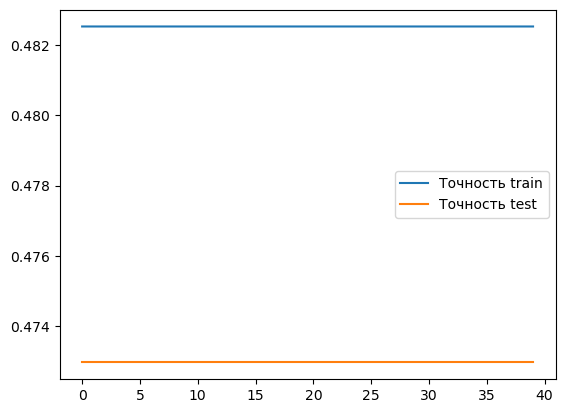

In [32]:
# модель полносвязной нейронной сети
modelNN_Emod = Sequential()
modelNN_Emod.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_Emod.add(Dropout(0.5))
modelNN_Emod.add(Dense(32, activation = 'sigmoid'))
modelNN_Emod.add(Dense(1, activation = 'relu'))
modelNN_Emod.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_Emod.summary()
history = modelNN_Emod.fit(X_train_norm,y_train_norm.iloc[:,0], 
                    epochs=40, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
19/19 - 2s - loss: 0.0511 - mae: 0.1806 - val_loss: 0.0382 - val_mae: 0.1528 - 2s/epoch - 97ms/step
Epoch 2/40
19/19 - 0s - loss: 0.0431 - mae: 0.1647 - val_loss: 0.0385 - val_m

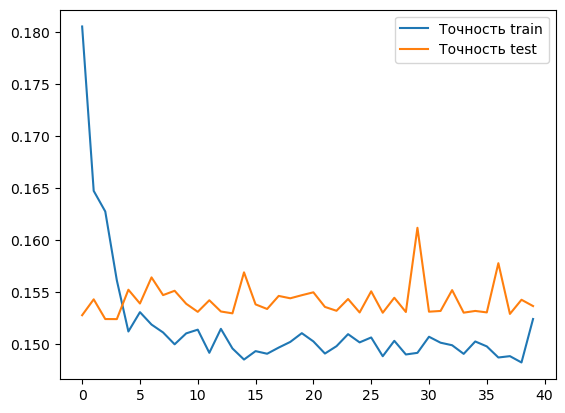

In [33]:
# модель полносвязной нейронной сети
modelNN_Rm = Sequential()
modelNN_Rm.add(Dense(16,  input_dim=11, activation = 'sigmoid'))
modelNN_Rm.add(Dropout(0.5))
modelNN_Rm.add(Dense(32, activation = 'sigmoid'))
modelNN_Rm.add(Dense(1, activation = 'relu'))
modelNN_Rm.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelNN_Rm.summary()
history = modelNN_Rm.fit(X_train_norm,y_train_norm.iloc[:,1], 
                    epochs=40, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('MAE')
plt.legend()

In [34]:
y_pred_Emod = modelNN_Emod.predict(X_test_norm)
y_pred_Rm = modelNN_Rm.predict(X_test_norm)

y_pred = np.hstack((y_pred_Emod,y_pred_Rm))
y_pred = scaler_norm_y.inverse_transform (y_pred)


MAE_NN_Emod = mean_absolute_error(y_test.iloc[:,0],y_pred[:,0])
MAE_NN_Rm = mean_absolute_error(y_test.iloc[:,1],y_pred[:,1])
print (MAE_NN_Emod)
print (MAE_NN_Rm)

R2_NN_Emod = r2_score(y_test.iloc[:,0],y_pred[:,0])
R2_NN_Rm = r2_score(y_test.iloc[:,1],y_pred[:,1])
print (R2_NN_Emod)
print (R2_NN_Rm)

9/9 [==============================] - 0s 1ms/step
7.717132233930303
370.9511049726705
-6.009279729135831
-0.013207162874740774


In [35]:
# записываем данные об ошибках в итоговую таблицу
MAE_Emod.append(['NeuralNetwork',MAE_NN_Emod])
MAE_Rm.append(['NeuralNetwork',MAE_NN_Rm])
R2_Emod.append(['NeuralNetwork',R2_NN_Emod])
R2_Rm.append(['NeuralNetwork',R2_NN_Rm])

### Результаты тестирования моделей

In [36]:
# Результаты - Модуль упругости при растяжении
a = np.array(MAE_Emod)
b = np.array(R2_Emod)

Emod_errors = pd.DataFrame({'Модель регрессии для модуля упругости при растяжении': a[:,0], 'MAE': a[:,1], 'R2': b[:,1]})
Emod_errors

,Модель регрессии для модуля упругости при растяжении,MAE,R2
0,Linear,2.6109355505901184,-0.024476898005094228
1,Ridge,2.599799822852645,-0.0176072820790818
2,Lasso,2.5948108078737024,-0.018703787461314736
3,ElasticNet,2.5801929025662833,-0.00887867080603466
4,GradientBoosting,2.689872202051526,-0.11828836205675297
5,KNeighbors,2.6225621597024773,-0.04185458098976058
6,DecisionTree,2.6411027582684223,-0.062390035961477075
7,RandomForest,2.6019352351995377,-0.027301522954636726
8,AdaBoost,2.6245569275380185,-0.044664526680911365
9,NeuralNetwork,7.717132233930303,-6.009279729135831


In [37]:
# Результаты - Прочность при растяжении
c = np.array(MAE_Rm)
d = np.array(R2_Rm)

Rm_errors = pd.DataFrame({'Модель регрессии для прочности при растяжении': c[:,0], 'MAE': c[:,1], 'R2': d[:,1]})
Rm_errors

,Модель регрессии для прочности при растяжении,MAE,R2
0,Linear,372.05238450611114,-0.003529768950333745
1,Ridge,369.8839728358888,0.00041666880810953266
2,Lasso,368.9355592328838,0.0033815533408245724
3,ElasticNet,368.8669394882762,-5.703200261408803e-05
4,GradientBoosting,368.8669394882762,-0.05211565229855042
5,KNeighbors,400.581653879789,-0.1709249661618053
6,DecisionTree,400.581653879789,-0.1709249661618053
7,RandomForest,371.4184397487922,-0.003377616156199359
8,AdaBoost,380.73763238321976,-0.05031382186657951
9,NeuralNetwork,370.9511049726705,-0.013207162874740774


# ИНС для Соотношения матрица-наполнитель

In [38]:
# хранение оценок моделей нейронной сети для Соотношения матрица-наполнитель
MAE=[]

In [39]:
X = df.drop(['Соотношение матрица-наполнитель'], axis=1)
X.head()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
1,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
3,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
5,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
6,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [40]:
y = df[['Соотношение матрица-наполнитель']]
y.head()

,Соотношение матрица-наполнитель
1,1.857143
3,1.857143
4,2.771331
5,2.767918
6,2.569620


In [41]:
#разбиение данных на тестовую и тренировочную часть
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [42]:
# нормализация  данных
scaler_norm = MinMaxScaler()
scaler_norm.fit(X)
X_norm = pd.DataFrame (data = scaler_norm.transform(X), columns=X.columns)
scaler_norm_y = MinMaxScaler()
scaler_norm_y.fit(y)
y_norm = pd.DataFrame (data = scaler_norm_y.transform(y), columns=y.columns)

In [43]:
#разбиение данных на тестовую и тренировочную часть
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, 
                                                                        test_size=0.3, random_state=42, shuffle=True)


In [44]:
 X_test_norm

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
319,0.606568,0.262975,0.168167,0.623366,0.336125,0.249173,0.387108,0.381499,0.622262,0.0,0.706867,0.419113
377,0.572051,0.460766,0.648652,0.491174,0.503444,0.056423,0.742719,0.605408,0.528535,0.0,0.536400,0.710983
538,0.865866,0.017946,0.441932,0.284092,0.307430,0.533239,0.364855,0.708160,0.347209,1.0,0.425178,0.579405
296,0.634618,0.443837,0.686176,0.449065,0.716173,0.562488,0.435807,0.438781,0.443355,0.0,0.741162,0.504853
531,0.207375,0.208688,0.254262,0.773874,0.645477,0.006541,0.468100,0.061865,0.307091,1.0,0.746784,0.785982
...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.527655,0.629811,0.450925,0.174515,0.310634,0.567634,0.359362,0.854766,0.445939,0.0,0.401549,0.717647
133,0.861772,0.423770,0.544413,0.446169,0.785778,0.288286,0.446885,0.347529,0.672341,0.0,0.291997,0.552182
490,0.543358,0.742716,0.571205,0.524973,0.235534,0.422609,0.609638,0.503825,0.493243,1.0,0.804264,0.611119
558,0.469573,0.915303,0.583719,0.662250,0.740273,0.413304,0.372351,0.568094,0.135191,1.0,0.288131,0.309775


In [45]:
 X_test

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
360,2013.208862,429.919092,62.743272,23.961233,248.849293,322.220632,71.758909,2167.533030,250.822178,0,9.718023,52.698107
427,2000.192995,751.441920,131.529481,22.208465,283.432980,73.430795,77.238628,2705.819718,223.967368,0,7.383516,69.437048
611,2110.985588,31.608469,101.935506,19.462720,242.918105,688.874406,71.416004,2952.839631,172.013665,90,5.860357,61.890952
336,2023.785804,723.921402,136.901365,21.650138,327.402856,726.627740,72.509332,2305.241225,199.561589,0,10.187672,57.615327
604,1862.679792,341.672132,75.068600,25.956842,312.790306,9.046203,73.006935,1399.118555,160.519027,90,10.264664,73.738350
...,...,...,...,...,...,...,...,...,...,...,...,...
479,1983.452057,1026.233755,103.222956,18.009823,243.580494,733.269062,71.331364,3305.286922,200.302003,0,5.536762,69.819230
149,2109.441659,691.301685,116.606570,21.611736,341.789754,372.705290,72.680026,2085.866383,265.171039,0,4.036464,60.329680
561,1989.373378,1209.768416,120.442159,22.656622,228.057719,546.080894,75.187942,2461.609016,213.855449,90,11.051849,63.709816
632,1961.550076,1490.320115,122.233630,24.476798,332.384000,534.070329,71.531521,2616.114331,111.265919,90,3.983520,46.427463


In [46]:
print(X_train_norm.shape)
print(X_test_norm.shape)
print(y_train_norm.shape)
print(y_test_norm.shape)

(645, 12)
(277, 12)
(645, 1)
(277, 1)


In [47]:
# функция для построения графика обучения
def plot_ANN(history):
    plt.plot(history.history['mae'], label = 'Точность train')
    plt.plot(history.history['val_mae'], label = 'Точность test')
    plt.xlabel = ('Epochs')
    plt.ylabel = ('MAE')
    plt.legend()
    plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                208       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 - 2s - loss: 0.2839 - mae: 0.4980 - val_loss: 0.2930 - val_mae: 0.5075 - 2s/epoch - 99ms/step
Epoch 2/50
19/19 - 0s - loss: 0.2839 - mae: 0.4980 - val_loss: 0.2930 - val_m

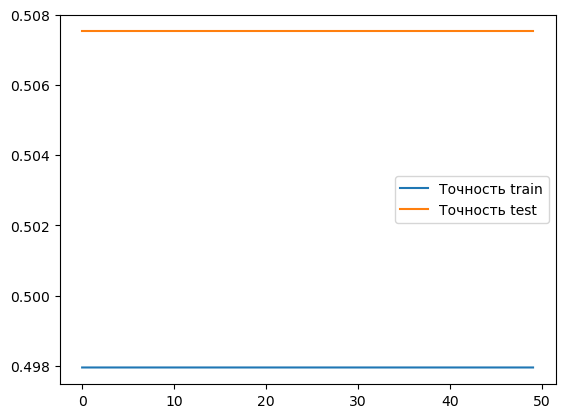

In [48]:
# модель ИНС 1
ANN_1 = Sequential()
ANN_1.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_1.add(Dropout(0.5))
ANN_1.add(Dense(32, activation = 'sigmoid'))
ANN_1.add(Dense(1, activation = 'relu'))
ANN_1.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_1.summary()
history = ANN_1.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                208       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 - 2s - loss: 1.8314 - mae: 1.3386 - val_loss: 1.5409 - val_mae: 1.2272 - 2s/epoch - 118ms/step
Epoch 2/50
19/19 - 0s - loss: 1.1149 - mae: 1.0234 - val_loss: 0.5916 - val_

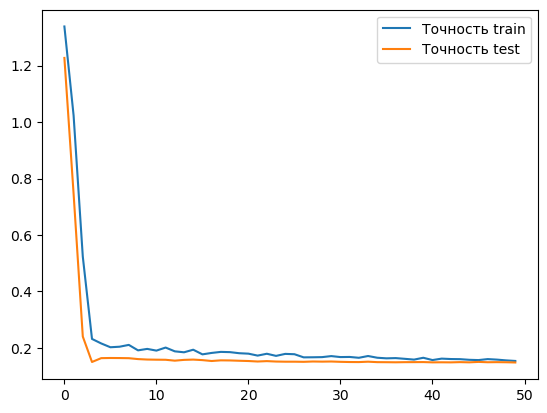

In [49]:
# модель ИНС 2
ANN_2 = Sequential()
ANN_2.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_2.add(Dropout(0.5))
ANN_2.add(Dense(32, activation = 'sigmoid'))
ANN_2.add(Dense(1, activation = 'tanh'))
ANN_2.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_2.summary()
history = ANN_2.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                416       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 1)                

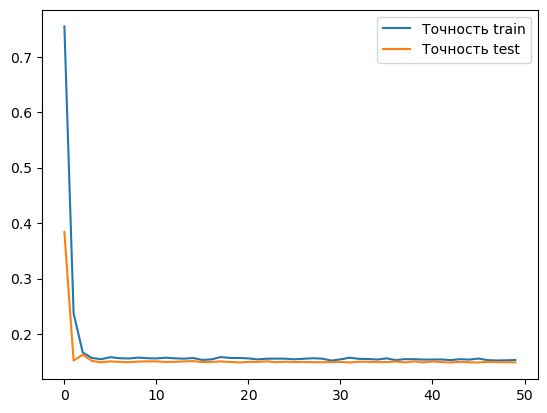

In [50]:
# модель ИНС 3
ANN_3 = Sequential([
                Dense(32,  input_dim=12, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(64, activation = 'sigmoid'),
                Dropout(0.5),
                Dense(32, activation = 'sigmoid'),
                Dense(16, activation = 'sigmoid'),
                Dense(1, activation = 'linear')])
ANN_3.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_3.summary()
history = ANN_3.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                208       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-traina

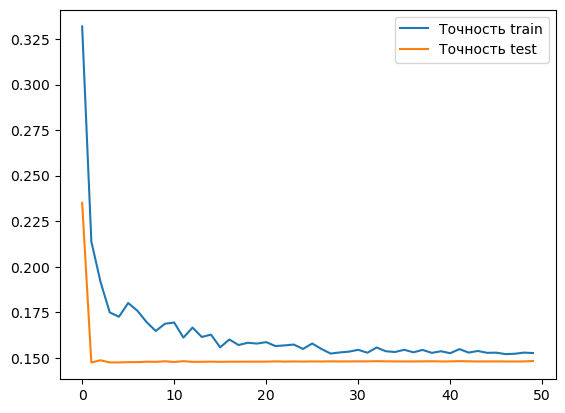

In [51]:
# модель ИНС 4
ANN_4 = Sequential()
ANN_4.add(Dense(16,  input_dim=12, activation = 'sigmoid'))
ANN_4.add(Dropout(0.5))
ANN_4.add(Dense(32, activation = 'sigmoid'))
ANN_4.add(Dropout(0.5))
ANN_4.add(Dense(16, activation = 'sigmoid'))
ANN_4.add(Dense(1, activation = 'tanh'))
ANN_4.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_4.summary()
history = ANN_4.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                832       
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,457
Trainable params: 3,457
Non-traina

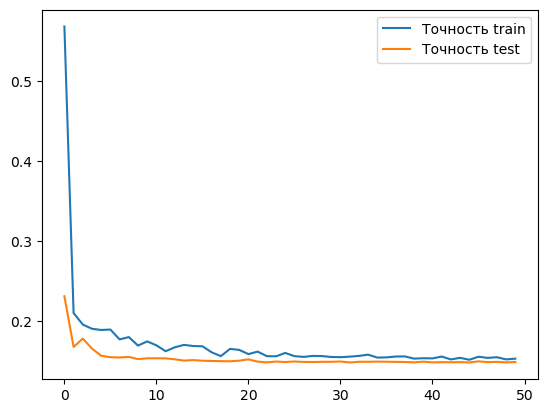

In [52]:
# модель ИНС 5
ANN_5 = Sequential()
ANN_5.add(Dense(64,  input_dim=12, activation = 'sigmoid'))
ANN_5.add(Dropout(0.5))
ANN_5.add(Dense(32, activation = 'sigmoid'))
ANN_5.add(Dropout(0.5))
ANN_5.add(Dense(16, activation = 'sigmoid'))
ANN_5.add(Dense(1, activation = 'tanh'))
ANN_5.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_5.summary()
history = ANN_5.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               1664      
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 16)               

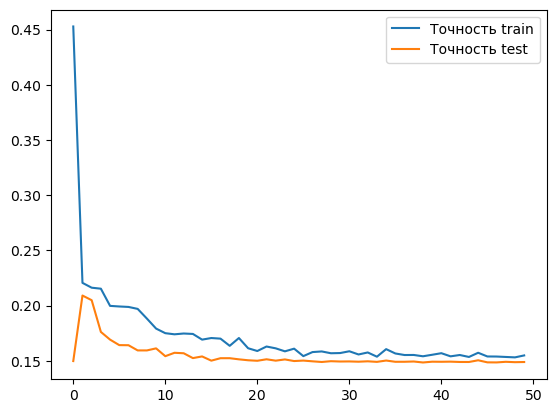

In [53]:
# модель ИНС 6
ANN_6 = Sequential()
ANN_6.add(Dense(128,  input_dim=12, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(64, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(32, activation = 'sigmoid'))
ANN_6.add(Dropout(0.5))
ANN_6.add(Dense(16, activation = 'sigmoid'))
ANN_6.add(Dense(1, activation = 'tanh'))
ANN_6.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_6.summary()
history = ANN_6.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1300      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100)               0         
                                                                 
 dense_31 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 51        
                                                                 
 dense_33 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6,403
Trainable params: 6,403
Non-traina

Epoch 63/80
19/19 - 0s - loss: 0.0360 - mae: 0.1516 - val_loss: 0.0355 - val_mae: 0.1481 - 115ms/epoch - 6ms/step
Epoch 64/80
19/19 - 0s - loss: 0.0360 - mae: 0.1517 - val_loss: 0.0355 - val_mae: 0.1481 - 115ms/epoch - 6ms/step
Epoch 65/80
19/19 - 0s - loss: 0.0360 - mae: 0.1517 - val_loss: 0.0355 - val_mae: 0.1481 - 120ms/epoch - 6ms/step
Epoch 66/80
19/19 - 0s - loss: 0.0360 - mae: 0.1517 - val_loss: 0.0355 - val_mae: 0.1481 - 110ms/epoch - 6ms/step
Epoch 67/80
19/19 - 0s - loss: 0.0360 - mae: 0.1517 - val_loss: 0.0356 - val_mae: 0.1480 - 122ms/epoch - 6ms/step
Epoch 68/80
19/19 - 0s - loss: 0.0360 - mae: 0.1516 - val_loss: 0.0356 - val_mae: 0.1480 - 118ms/epoch - 6ms/step
Epoch 69/80
19/19 - 0s - loss: 0.0360 - mae: 0.1516 - val_loss: 0.0357 - val_mae: 0.1480 - 109ms/epoch - 6ms/step
Epoch 70/80
19/19 - 0s - loss: 0.0360 - mae: 0.1516 - val_loss: 0.0356 - val_mae: 0.1480 - 112ms/epoch - 6ms/step
Epoch 71/80
19/19 - 0s - loss: 0.0360 - mae: 0.1516 - val_loss: 0.0356 - val_mae: 0.1480

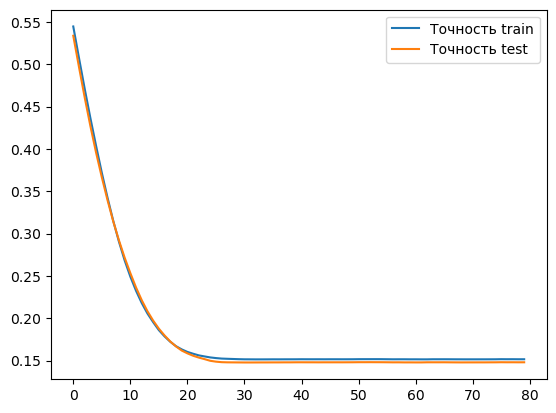

In [54]:
# модель ИНС 7
ANN_7 = Sequential()
ANN_7.add(Dense(100, input_dim=12, activation='sigmoid'))
ANN_7.add(LeakyReLU(alpha=1.0))
ANN_7.add(Dense(50, activation='sigmoid'))
ANN_7.add(LeakyReLU(alpha=1.0))
ANN_7.add(Dense(1, activation='softmax'))
ANN_7.add(Dense(1, activation='linear'))
ANN_7.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_7.summary()
history = ANN_7.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 100)               1300      
                                                                 
 dropout_13 (Dropout)        (None, 100)               0         
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 100)               0         
                                                                 
 dense_35 (Dense)            (None, 50)                5050      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_36 (Dense)            (None, 25)                1275      
                                                                 
 dense_37 (Dense)            (None, 1)                

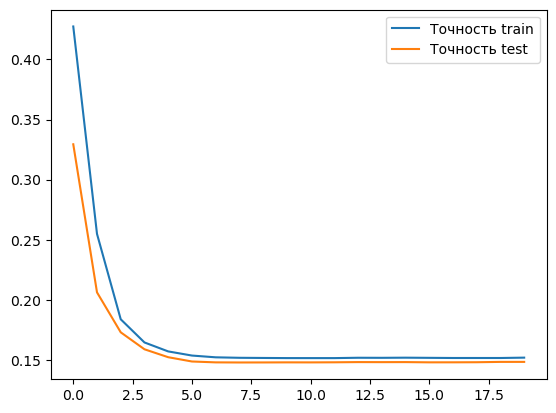

In [55]:
# модель ИНС 8
ANN_8 = Sequential()
ANN_8.add(Dense(100, input_dim=12, activation='sigmoid'))
ANN_8.add(Dropout(0.5))
ANN_8.add(LeakyReLU(alpha=1.0))
ANN_8.add(Dense(50, activation='sigmoid'))
ANN_8.add(LeakyReLU(alpha=1.0))
ANN_8.add(Dense(25, activation='softmax'))
ANN_8.add(Dense(1, activation='linear'))
ANN_8.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_8.summary()
history = ANN_8.fit(X_train_norm,y_train_norm, epochs=20, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 16)                208       
                                                                 
 dropout_14 (Dropout)        (None, 16)                0         
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 8)                 136       
                                                                 
 dense_40 (Dense)            (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
19/19 - 2s - loss: 0.7568 - mae: 0.8447 - va

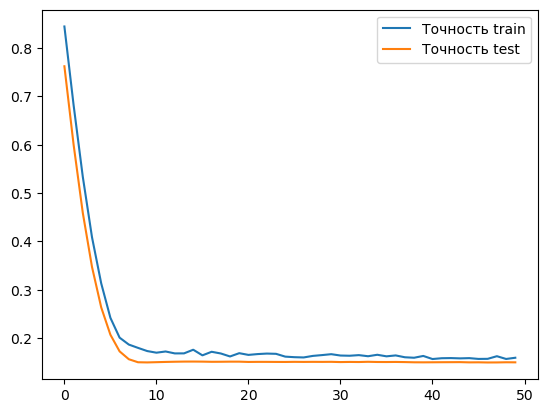

In [56]:
# модель ИНС 9
ANN_9 = Sequential()
ANN_9.add(Dense(16, input_dim=12, activation='sigmoid'))
ANN_9.add(Dropout(0.5))
ANN_9.add(LeakyReLU(alpha=1.0))
ANN_9.add(Dense(8, activation='sigmoid'))
ANN_9.add(Dense(1, activation='linear'))
ANN_9.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_9.summary()
history = ANN_9.fit(X_train_norm,y_train_norm, epochs=50, validation_split=0.1, verbose=2)
plot_ANN(history)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 16)                208       
                                                                 
 dropout_15 (Dropout)        (None, 16)                0         
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_42 (Dense)            (None, 8)                 136       
                                                                 
 dense_43 (Dense)            (None, 1)                 9         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
19/19 - 2s - loss: 0.4189 - mae: 0.5867 - v

19/19 - 0s - loss: 0.0368 - mae: 0.1543 - val_loss: 0.0353 - val_mae: 0.1490 - 105ms/epoch - 6ms/step
Epoch 64/150
19/19 - 0s - loss: 0.0375 - mae: 0.1557 - val_loss: 0.0353 - val_mae: 0.1488 - 117ms/epoch - 6ms/step
Epoch 65/150
19/19 - 0s - loss: 0.0370 - mae: 0.1543 - val_loss: 0.0353 - val_mae: 0.1475 - 106ms/epoch - 6ms/step
Epoch 66/150
19/19 - 0s - loss: 0.0373 - mae: 0.1537 - val_loss: 0.0352 - val_mae: 0.1480 - 113ms/epoch - 6ms/step
Epoch 67/150
19/19 - 0s - loss: 0.0374 - mae: 0.1546 - val_loss: 0.0353 - val_mae: 0.1482 - 123ms/epoch - 6ms/step
Epoch 68/150
19/19 - 0s - loss: 0.0366 - mae: 0.1536 - val_loss: 0.0353 - val_mae: 0.1485 - 114ms/epoch - 6ms/step
Epoch 69/150
19/19 - 0s - loss: 0.0370 - mae: 0.1550 - val_loss: 0.0353 - val_mae: 0.1479 - 113ms/epoch - 6ms/step
Epoch 70/150
19/19 - 0s - loss: 0.0363 - mae: 0.1532 - val_loss: 0.0353 - val_mae: 0.1480 - 115ms/epoch - 6ms/step
Epoch 71/150
19/19 - 0s - loss: 0.0366 - mae: 0.1527 - val_loss: 0.0353 - val_mae: 0.1486 - 1

Epoch 135/150
19/19 - 0s - loss: 0.0368 - mae: 0.1550 - val_loss: 0.0354 - val_mae: 0.1486 - 115ms/epoch - 6ms/step
Epoch 136/150
19/19 - 0s - loss: 0.0367 - mae: 0.1525 - val_loss: 0.0356 - val_mae: 0.1477 - 110ms/epoch - 6ms/step
Epoch 137/150
19/19 - 0s - loss: 0.0357 - mae: 0.1506 - val_loss: 0.0354 - val_mae: 0.1485 - 114ms/epoch - 6ms/step
Epoch 138/150
19/19 - 0s - loss: 0.0364 - mae: 0.1533 - val_loss: 0.0354 - val_mae: 0.1489 - 116ms/epoch - 6ms/step
Epoch 139/150
19/19 - 0s - loss: 0.0362 - mae: 0.1528 - val_loss: 0.0354 - val_mae: 0.1487 - 106ms/epoch - 6ms/step
Epoch 140/150
19/19 - 0s - loss: 0.0364 - mae: 0.1525 - val_loss: 0.0354 - val_mae: 0.1480 - 114ms/epoch - 6ms/step
Epoch 141/150
19/19 - 0s - loss: 0.0365 - mae: 0.1533 - val_loss: 0.0354 - val_mae: 0.1489 - 120ms/epoch - 6ms/step
Epoch 142/150
19/19 - 0s - loss: 0.0365 - mae: 0.1524 - val_loss: 0.0354 - val_mae: 0.1487 - 113ms/epoch - 6ms/step
Epoch 143/150
19/19 - 0s - loss: 0.0365 - mae: 0.1531 - val_loss: 0.0354

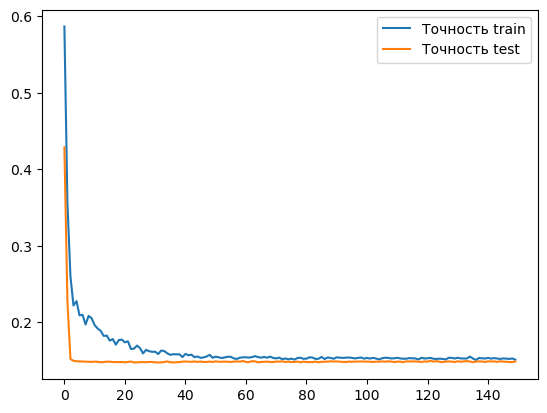

In [57]:
# модель ИНС 10
ANN_10 = Sequential()
ANN_10.add(Dense(16, input_dim=12, activation='sigmoid'))
ANN_10.add(Dropout(0.5))
ANN_10.add(LeakyReLU(alpha=1.0))
ANN_10.add(Dense(8, activation='sigmoid'))
ANN_10.add(Dense(1, activation='linear'))
ANN_10.compile(optimizer='adam', loss='mse', metrics=['mae'])
ANN_10.summary()
history = ANN_10.fit(X_train_norm,y_train_norm, epochs=100, validation_split=0.1, verbose=2)
plot_ANN(history)

In [58]:
y_pred_1 = ANN_1.predict(X_test_norm)
y_pred_2 = ANN_2.predict(X_test_norm)
y_pred_3 = ANN_3.predict(X_test_norm)
y_pred_4 = ANN_4.predict(X_test_norm)
y_pred_5 = ANN_5.predict(X_test_norm)
y_pred_6 = ANN_6.predict(X_test_norm)
y_pred_7 = ANN_7.predict(X_test_norm)
y_pred_8 = ANN_8.predict(X_test_norm)
y_pred_9 = ANN_9.predict(X_test_norm)
y_pred_10 = ANN_10.predict(X_test_norm)

y_pred1 = scaler_norm_y.inverse_transform (y_pred_1)
y_pred2 = scaler_norm_y.inverse_transform (y_pred_2)
y_pred3 = scaler_norm_y.inverse_transform (y_pred_3)
y_pred4 = scaler_norm_y.inverse_transform (y_pred_4)
y_pred5 = scaler_norm_y.inverse_transform (y_pred_5)
y_pred6 = scaler_norm_y.inverse_transform (y_pred_6)
y_pred7 = scaler_norm_y.inverse_transform (y_pred_7)
y_pred8 = scaler_norm_y.inverse_transform (y_pred_8)
y_pred9 = scaler_norm_y.inverse_transform (y_pred_9)
y_pred10 = scaler_norm_y.inverse_transform (y_pred_10)

MAE_1 = mean_absolute_error(y_test,y_pred1)
print (MAE_1)
MAE_2 = mean_absolute_error(y_test,y_pred2)
print (MAE_2)
MAE_3 = mean_absolute_error(y_test,y_pred3)
print (MAE_3)
MAE_4 = mean_absolute_error(y_test,y_pred4)
print (MAE_4)
MAE_5 = mean_absolute_error(y_test,y_pred5)
print (MAE_5)
MAE_6 = mean_absolute_error(y_test,y_pred6)
print (MAE_6)
MAE_7 = mean_absolute_error(y_test,y_pred7)
print (MAE_7)
MAE_8 = mean_absolute_error(y_test,y_pred8)
print (MAE_8)
MAE_9 = mean_absolute_error(y_test,y_pred9)
print (MAE_9)
MAE_10 = mean_absolute_error(y_test,y_pred10)
print (MAE_10)

9/9 [==============================] - 0s 2ms/step
2.386060661491529
0.7103344742095586
0.710182311326837
0.7106631308360256
0.710136849982032
0.7103460750628662
0.7107693897792183
0.7101773496932328
0.7103751039836611
0.7112323611944159


In [59]:
# записываем данные об ошибках в итоговую таблицу
MAE.append(['Нейросеть 1',MAE_1])
MAE.append(['Нейросеть 2',MAE_2])
MAE.append(['Нейросеть 3',MAE_3])
MAE.append(['Нейросеть 4',MAE_4])
MAE.append(['Нейросеть 5',MAE_5])
MAE.append(['Нейросеть 6',MAE_6])
MAE.append(['Нейросеть 7',MAE_7])
MAE.append(['Нейросеть 8',MAE_8])
MAE.append(['Нейросеть 9',MAE_9])
MAE.append(['Нейросеть 10',MAE_10])

In [60]:
# Результаты расчета ошибок нейросетей при предсказании целевого признака "Соотношение матрица-наполнитель"
MAE

[['Нейросеть 1', 2.386060661491529],
 ['Нейросеть 2', 0.7103344742095586],
 ['Нейросеть 3', 0.710182311326837],
 ['Нейросеть 4', 0.7106631308360256],
 ['Нейросеть 5', 0.710136849982032],
 ['Нейросеть 6', 0.7103460750628662],
 ['Нейросеть 7', 0.7107693897792183],
 ['Нейросеть 8', 0.7101773496932328],
 ['Нейросеть 9', 0.7103751039836611],
 ['Нейросеть 10', 0.7112323611944159]]

In [61]:
#  результаты MAE
a = np.array(MAE)

MAE_errors = pd.DataFrame({'Версия нейросети': a[:,0], 'MAE Соотношение матрица-наполнитель': a[:,1]})
MAE_errors = MAE_errors.astype({'MAE Соотношение матрица-наполнитель': np.float16})
MAE_errors

,Версия нейросети,MAE Соотношение матрица-наполнитель
0,Нейросеть 1,2.386719
1,Нейросеть 2,0.710449
2,Нейросеть 3,0.709961
3,Нейросеть 4,0.710449
4,Нейросеть 5,0.709961
5,Нейросеть 6,0.710449
6,Нейросеть 7,0.710938
7,Нейросеть 8,0.709961
8,Нейросеть 9,0.710449
9,Нейросеть 10,0.711426


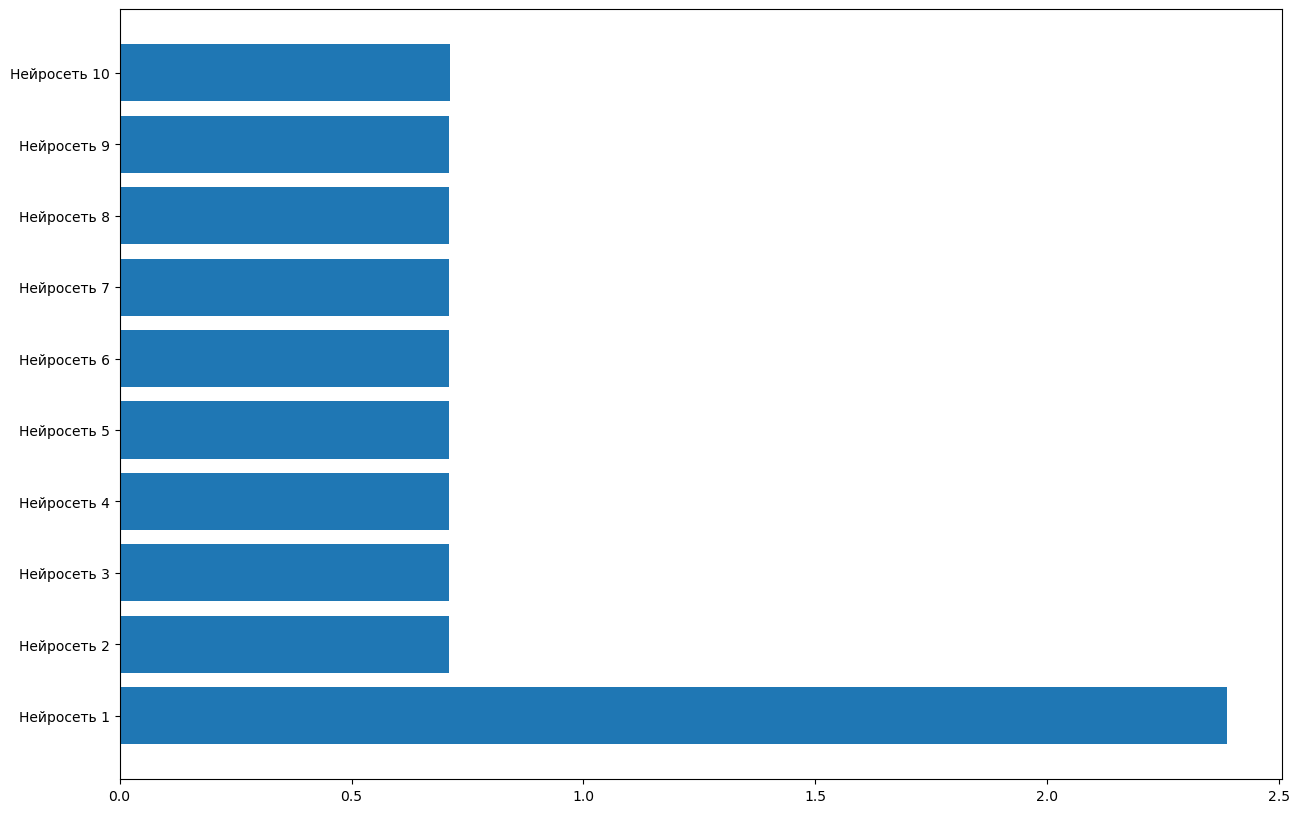

In [62]:
# Гистограмма ошибки
plt.figure(figsize=(15, 10))
plt.barh(MAE_errors['Версия нейросети'], MAE_errors['MAE Соотношение матрица-наполнитель'])
plt.show()

In [ ]:
# Запишем результаты сравнения в файл
MAE_errors.to_excel('./Datasets/MAE_errors.xlsx')
R2_errors.to_excel('./Datasets/R2_errors.xlsx')

In [ ]:
model_y5.save('mn_model_nn')

In [ ]:
# НС на исходных очищенных данных (не нормализованных) 
model= Sequential()
model.add(Dense(100, input_dim=12, activation='sigmoid'))
model.add(LeakyReLU(alpha=1.0))
model.add(Dense(50, activation='sigmoid'))
model.add(LeakyReLU(alpha=1.0))
model.add(Dense(1, activation='softmax'))

#IMPORTANT PART
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()
history = model.fit(X_train,y_train, 
                    epochs=250, 
                    validation_split=0.1, 
                    verbose=2)
plt.plot(history.history['mae'], label = 'Точность train')
plt.plot(history.history['val_mae'], label = 'Точность test')
plt.xlabel = ('Epochs')
plt.ylabel = ('mae')
plt.legend()
plt.show()

In [ ]:
y_pr = model.predict(X_test)
MAE = mean_absolute_error(y_test,y_pr)
print (MAE)

In [ ]:
model.save('mn_model_nn1')

In [ ]:
y_pr8 = model_y8.predict(X_test)
MAE = mean_absolute_error(y_test,y_pr8)
print (MAE)

In [ ]:
model_y8.save('mn_model_nn8')

# Сохранение модели

In [ ]:
!pip freeze > ../requirements.txt